# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [96,126,62]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0     23  2616     8118     145              3874           217
1  19219  1840     1658    8195               349           483
2   7823  6245     6544    4154              4074           964

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

0. Hard to say, the absence of fresh, frozen produce and delicatessen rules out any traditional store. A high amount of groceries and detergent/paper sounds like it could be some kind of convenience store.
1. Fresh and frozen foods most prevalent. A low-quality restaurants that serves a lot of salad?
2. Very even spread between all categories. I would call this a standard supermarket.

I would say the overall mean is not the most useful as we're looking at very disparate data where there are most likely bimodal or higher order distributions so looking at the mean is not very telling.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTR

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Milk'], axis = 1)
features = data[['Milk']]

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, features, test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DTR()
regressor.fit(X_train,y_train)

# TODO: Report the score of the prediction using the testing set
print('Score is %0.3f' % regressor.score(X_test,y_test))


Score is 0.203


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

- I attempted to predict the habit of buying Milk with other features, predicting that Milk is corellated wihth buying groceries.
- The reported score is 0.181.
- As the R^2 score is low, this feature looks like it is hard to predict using other features and is necessary for identifying spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

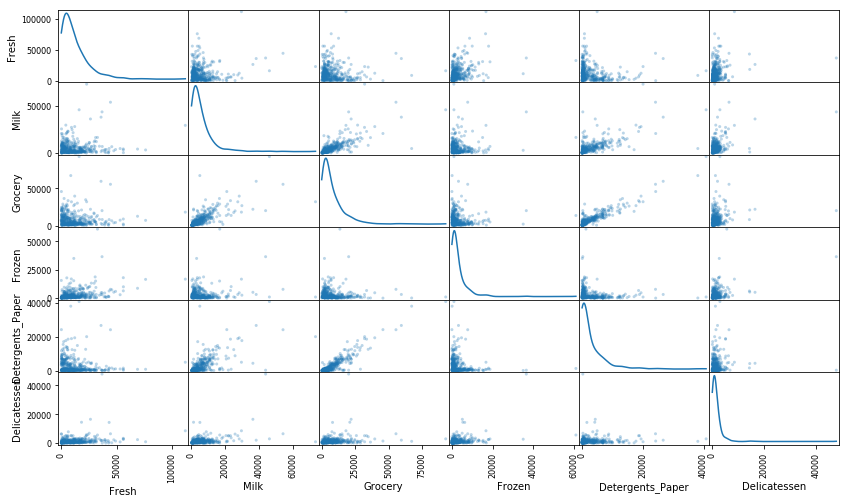

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

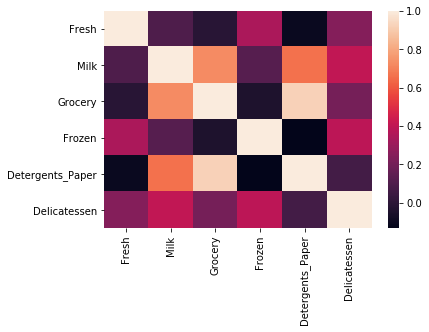

In [6]:
# Heat map of data corellation
import seaborn as sns

ax = sns.heatmap(data.corr())

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
- Due to the outliers, a regular scatterplot is not ideal for looking at relationships in the data because the scale is thrown off quite a bit, especially in the Deli data where there is one point that looks to be almost an order of magnitude higher than the rest. The majority of the data looks to follow a right skewed distribution where most of the data poins are closeer to 0 and there is a tail going out into the higher numbers. That being said, it looks like Detergents/Paper is fairly elongated which could signal a bimodal distribution (which also makes sense when looking at the difference in values for the three samples I picked). Something similar can be observed for the Fresh category.
- Based on the heat map, there is one pair with a degree of correlation around 0.9: Grocery and Detergents/Paper. 
  <br>There are two more that fall around 0.7: 
  - Grocery and Milk
  - Milk and Getergents/Paper
- Milk has a moderate degree of corellation with two other categories but is pretty low for the remaining three. So while two other features sort of predict Milk, overall it still needs to be included which goes against my initial hunch about the category.
- The majority of the data looks to be of a right skewed distribution which is seen through the "clump" of data that is closer to zero and a longer tail heading out to the higher values.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

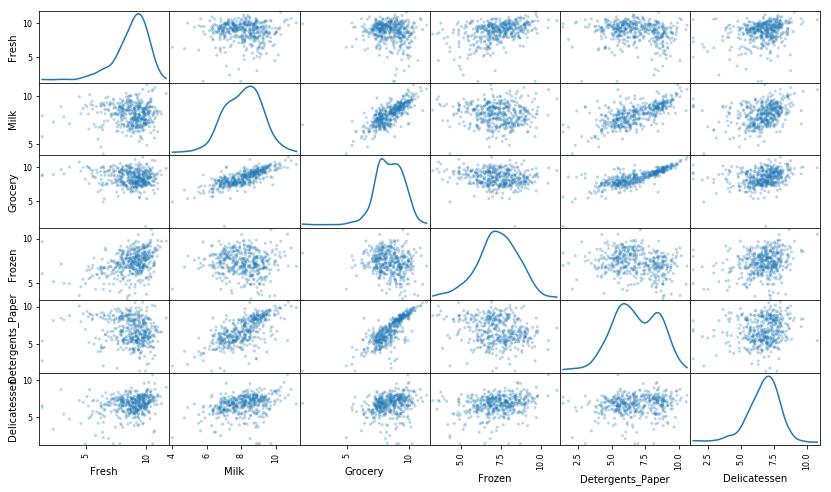

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  3.178054  7.869784  9.001962  4.983607          8.262301      5.384495
1  9.863707  7.518064  7.413970  9.011402          5.857933      6.182085
2  8.964951  8.739697  8.786457  8.332068          8.312626      6.872128

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
display(log_data.describe())

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Q1 %.3f - Q3 %.3f"%(Q1,Q3))
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [
            # Fresh
            95, 338, 66,
            # Milk
            98, 154, 356,
            # Grocery
            75, 154,
            # Frozen
            38, 57, 65, 145, 175, 264, 420, 429, 439,
            # Detergents_Paper
            75, 161, 
            # Delicatessen
            66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343
            ]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.732813    8.121615    8.442205    7.303128          6.791781   
std      1.470618    1.080635    1.111523    1.281888          1.709519   
min      1.386294    4.025352    1.386294    3.258097          1.386294   
25%      8.048378    7.335633    7.675081    6.611024          5.551989   
50%      9.048404    8.196435    8.467267    7.331043          6.706242   
75%      9.737123    8.880619    9.273948    8.176177          8.274596   
max     11.627610   11.205027   11.437997   11.016496         10.617123   

       Delicatessen  
count    440.000000  
mean       6.671094  
std        1.293960  
min        1.386294  
25%        6.014321  
50%        6.873680  
75%        7.507278  
max       10.777789

Q1 8.048 - Q3 9.737
Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.454347   9.950371  10.732672  3.610918         10.095429      7.261225
66   2.302585   7.336286   8.911665  5.170484          8.151622      3.332205
81   5.393628   9.163354   9.575261  5.648974          8.964312      5.056246
95   1.386294   7.979681   8.740817  6.089045          5.411646      6.565265
96   3.178054   7.869784   9.001962  4.983607          8.262301      5.384495
128  4.948760   9.087947   8.249052  4.962845          6.968850      1.386294
171  5.303305  10.160569   9.894295  6.480045          9.079548      8.740497
193  5.198497   8.156510   9.918031  6.866933          8.633909      6.502790
218  2.944439   8.923325   9.629445  7.159292          8.475954      8.759826
304  5.087596   8.917445  10.117550  6.426488          9.374498      7.787797
305  5.497168   9.468079   9.088512  6.684612          8.271293      5.356586
338  1.386294   5.811141   8.856803  9.655154          2.772589      6.311735
353  4.770685   8.742734   9.961945  5.433722          9.069122      7.013915
355  5.252273   6.590301   7.607381  5.505332          5.220356      4.852030
357  3.637586   7.151485  10.011130  4.927254          8.817001      4.709530
412  4.584967   8.190354   9.425532  4.595120          7.996654      4.143135

Q1 7.336 - Q3 8.881
Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.040027  11.205027  10.377078  6.895683          9.907031      6.806829
98    6.222576   4.727388   6.658011  6.797940          4.043051      4.890349
154   6.434547   4.025352   4.927254  4.330733          2.079442      2.197225
356  10.029547   4.905275   5.389072  8.057694          2.302585      6.308098

Q1 7.675 - Q3 9.274
Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923241  7.037028  1.386294  8.391176          1.386294      6.883463
154  6.434547  4.025352  4.927254  4.330733          2.079442      2.197225

Q1 6.611 - Q3 8.176
Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.432071  9.663325   9.723763   3.526361          8.847504      6.073045
57    8.597482  9.203718   9.257987   3.663562          8.932345      7.156956
65    4.454347  9.950371  10.732672   3.610918         10.095429      7.261225
145  10.000614  9.034200  10.457171   3.761200          9.440817      8.396381
175   7.759614  8.967759   9.382191   3.970292          8.342125      7.437206
264   6.979145  9.177817   9.645105   4.127134          8.696343      7.143618
325  10.395681  9.728241   9.519808  11.016496          7.149132      8.632306
420   8.402231  8.569216   9.490091   3.258097          8.827468      7.239933
429   9.060447  7.467942   8.183397   3.871201          4.442651      7.824846
439   7.933080  7.437795   7.828436   4.189655          6.169611      3.970292

Q1 5.552 - Q3 8.275
Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923241  7.037028  1.386294  8.391176          1.386294      6.883463
161  9.428270  6.293419  5.648974  6.996681          1.386294      7.711549

Q1 6.014 - Q3 7.507
Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.302585   7.336286   8.911665   5.170484          8.151622   
109   7.249215   9.724959  10.274603   6.513230          6.729824   
128   4.948760   9.087947   8.249052   4.962845          6.968850   
137   8.035279   8.997271   9.021961   6.495266          6.582025   
142  10.519673   8.875287   9.018453   8.005033          3.044522   
154   6.434547   4.025352   4.927254   4.330733          2.079442   
183  10.514557  10.690831   9.912001  10.506026          5.480639   
184   5.793014   6.823286   8.457655   4.317488          5.814131   
187   7.799343   8.987572   9.192176   8.743532          8.149024   
203   6.369901   6.530878   7.703910   6.152733          6.861711   
233   6.872128   8.514189   8.106816   6.843750          6.016157   
285  10.602989   6.463029   8.188967   6.949856          6.079933   
289  10.663990   5.659482   6.156979   7.236339          3.496508   
343   7.432484   8.848653  10.177970   7.284135          9.646658   

     Delicatessen  
66       3.332205  
109      1.386294  
128      1.386294  
137      3.610918  
142      1.386294  
154      2.197225  
183     10.777789  
184      2.484907  
187      1.386294  
203      2.944439  
233      2.079442  
285      2.944439  
289      3.135494  
343      3.637586

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- 154 was present in three categories. 65, 66, 75, 128 were present in two, the rest in one only.
- Yes, definitely. We need a cleaner set of data that is not going to get skewed due to outliers that can also be described as noise.
- I added all points that were more than 3 points outside of the interquartile to the outlier list. My reasoning is that k-means is bad with noise and will start skewing and misclassifying when outliers are present. If they are still fairly close to the interquartile, i.e. 1 or 2 points, to me that is still a close enough point to consider and it should be kept.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4777
Dimension 2    0.7341
Dimension 3    0.8437
Dimension 4    0.9329
Dimension 5    0.9779
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

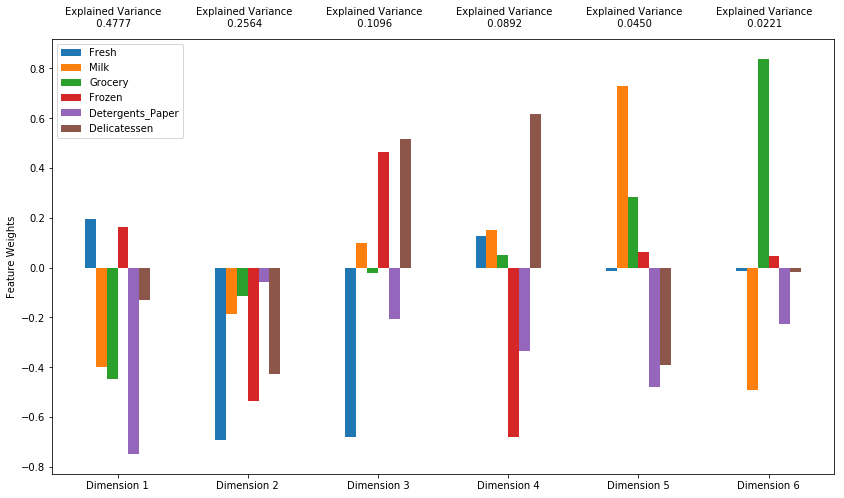

In [10]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca_results['Explained Variance'].cumsum())

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

- 0.7334 is explained in total by the first and second principal component
- First four principal components explain 0.9329
- It looks like the negative variance implies a higher spending in a given category for that dimension. So
    - The 1st dimension is very strongly related to higher spending in the detergents/paper and milk/grocery categories. This looks like a supermarket.
    - Second is fresh/frozen/deli. This looks like something closer to a restaurant.
    - Third is fresh, no frozen or deli. This looks like a produce seller.
    - Fourth is frozen and detergents, no deli. Sounds like a convenience store.
    - Fifth is detegerent/paper and deli (but almost no milk).
    - Sixth is milk and detergent/paper but no groceries.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.5195       5.7119       1.6705      -0.4275      -0.2546   
1       1.9990      -1.0327      -0.1110      -1.1632       0.0468   
2      -1.3146      -0.8670       0.1284      -0.9567      -0.1495   

   Dimension 6  
0       0.2518  
1      -0.2694  
2      -0.3097

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [12]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [13]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.5195       5.7119
1       1.9990      -1.0327
2      -1.3146      -0.8670

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

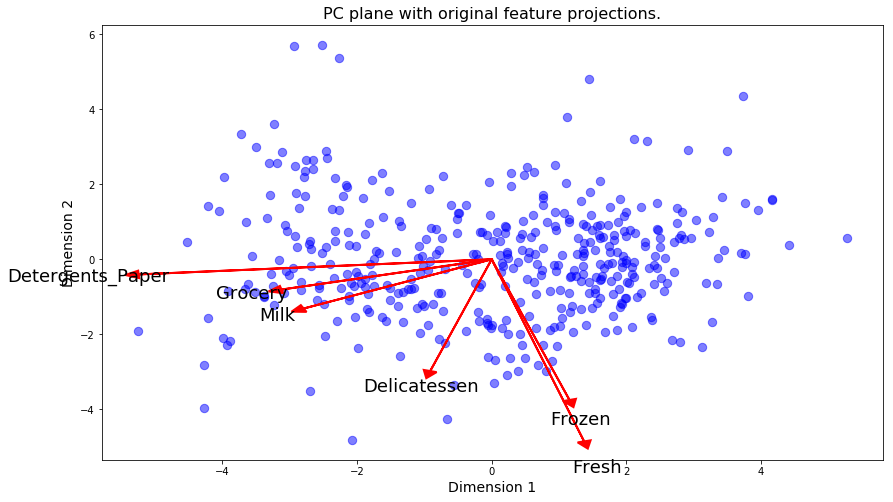

In [14]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

- K-Means has advantages in terms of running time and interpretability of data. It works well with spherical cluster shapes, cannot separate non-linear geometrical shaped clusters.
- GMMs do not assume any particular geometry from the outset and therefore does not have a certain set of attributes like a centre and a rough spherical shape. 
- When looking at the data and the two dimensional graph with the feature projections, it makes sense that there will be a "harder" separation between clusters. This is due to the high disparity in terms of the spread of certain features (detergents/paper in particular). It will also be easier to visualize a K-Means cluster separation and infer something about what that cluster means. Because of these reasons, K-Means is preferred.

Sources:
https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = np.arange(30,1,-1)

# TODO: Apply your clustering algorithm of choice to the reduced data 
for i in clusters:
    clusterer = KMeans(n_clusters=i)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print('pca_samples cluster allocation: {0}'.format(", ".join(str(j) for j in sample_preds)))
    print('Silhouette score for %s clusters is %.3f\n' % (i,score))

pca_samples cluster allocation: 18, 20, 14
Silhouette score for 30 clusters is 0.370

pca_samples cluster allocation: 19, 21, 24
Silhouette score for 29 clusters is 0.356

pca_samples cluster allocation: 11, 3, 1
Silhouette score for 28 clusters is 0.364

pca_samples cluster allocation: 6, 3, 22
Silhouette score for 27 clusters is 0.370

pca_samples cluster allocation: 17, 11, 13
Silhouette score for 26 clusters is 0.355

pca_samples cluster allocation: 11, 1, 3
Silhouette score for 25 clusters is 0.351

pca_samples cluster allocation: 11, 9, 17
Silhouette score for 24 clusters is 0.349

pca_samples cluster allocation: 13, 18, 8
Silhouette score for 23 clusters is 0.357

pca_samples cluster allocation: 13, 18, 19
Silhouette score for 22 clusters is 0.355

pca_samples cluster allocation: 20, 6, 15
Silhouette score for 21 clusters is 0.330

pca_samples cluster allocation: 14, 10, 0
Silhouette score for 20 clusters is 0.337

pca_samples cluster allocation: 14, 16, 4
Silhouette score for 1

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

I tried a range of clusters from 2 through 30. Interestingly, 2 clusters achieves the highest score by far, with 3 being second best an the rest starting to trail behind. Refer to the output above for the individual scores.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

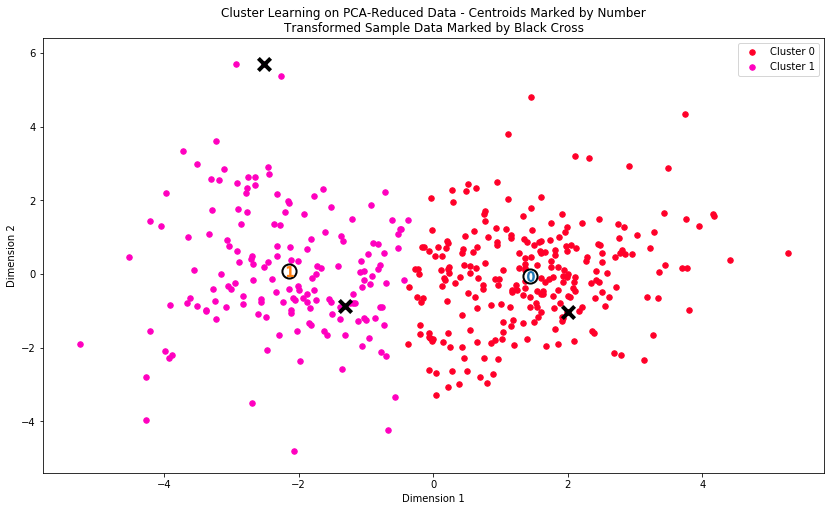

In [16]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [17]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  9415.0  1957.0   2487.0  2137.0             319.0         757.0
Segment 1  4185.0  7969.0  12120.0  1088.0            4664.0        1134.0

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

The biggest difference when looking at the centres is a much smaller mean for milk/grocery/detergents categories for segment 1. To me, this signifies a certrain type of restaurant, for example a raw vegan joint that uses mostly produce and certain frozen foods.

Segment 0 has an order magnitude more for the detergent mean and is only less represented in the fresh and frozen categories. This leads me to believe this is a supermarket that stocks a range of products.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [18]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

Point 0 an 2 belong to supermarket category, with point 1 in the raw vegan restaurant. Based on detergent/paper category alone I would say it's already consistent. Same goes for the prevalence of fresh/frozen for point 1 compared to 0/2.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

We cannot assume that as more frequent deliveries will change the inventory levels and how they are replenished in a larger supermarket. This might mean more man hours needed to receive and stock inventory. We would need to set the right number of segments to properly describe the various customers and then to perform the Data Recovery step to look at how the means (and stdev) are reacting. If the means are trending up for a given segment without a marked increase in variance/stdev, we can deduce that set of customer is reacting positively. If this is a trend that can be observed across the various segments, then the change is an overall positive one and we can say that the A/B test is successful in terms of the new delivery service timing.

Another very important point is that the treatment and control groups have to be highly similar to each other for the test to be deemed successful. One way to ensure this is to make sure each data point in control group A also appears in group B, i.e. the same wholesale customer is tested for under the same circumstances and duration with the one exception being delivery service time. We can then perform another round of k-means clustering on treatment group B and compare how different the clusters are from the original predictions. If the accuracy score between predictions in group A and B is high, we can infer that our groups exhibit a high level of similarity. 

I would actually perform the same set of cluster creation trials first to see how the silhouette coefficient does for different cluster numbers in group B to use it as another point of comparison between the data sets; if they are relatively similar that signifies good similarity. Afterwards, I would use 2 segments for the final comparison of clustering predictions as that is what is most closely related to the actual underlying distributions.

One final note is that in the end, the increase/decrease in spending on a given category might not be equal amongst the two segments and there might actually be a negative corellation in one but a positive in the other. In this case, the correct approach would be to keep the original delivery service for one segment but reduce it for the other (if that is a feasible strategy for the distributor).

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

As mentioned in the hint, we can use a number of different supervised learning algorithms to train based on original customer data with the predictions being the cluster/segment they belong to. Once we get a good enough accuracy score, we can then run the new customers through the model and get the classifier to predcict what segment they'll belong to.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

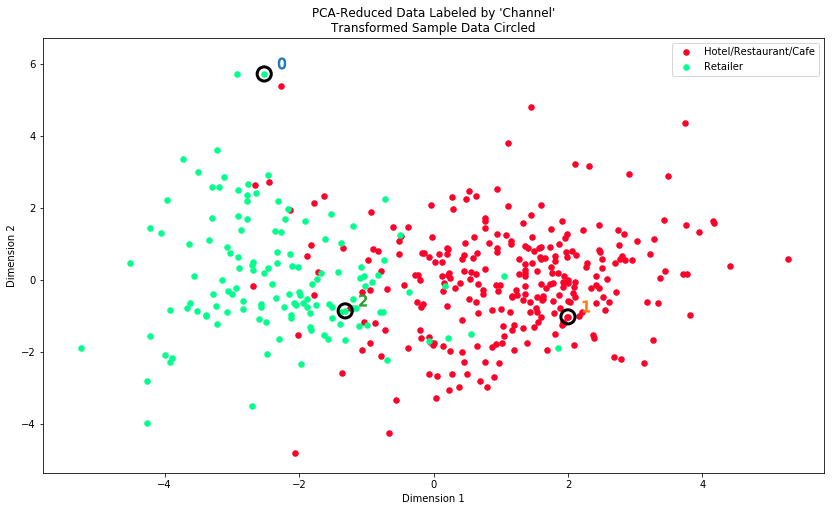

In [19]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

- The number of clusters corresponds exactly to the two categories (although I named the restaurant segment a bit more specifically). k Means cannot separate out the outliers as well if we compare both graphs - retailers that look more like HoReCa based on the two dimensions will be grouped into the HoReCa category, same with HoReCa within the main retailer "cloud".
- The underlying distributions have a lot more spread and overlap when compared to the customer segments but there are still pretty clear and distinct center points where the segments and the distributions agree, in particular the centroids for the two clusters.
- It is definitely consistent and pretty satisfying that the initial hypothesis about who the segments are was largely correct.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.